In [21]:
!pip install -U pandas-profiling

     |████████████████████████████████| 248 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 28.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 29.6 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 33.0 MB/s eta 0:00:01
     |████████████████████████████████| 13.7 MB 22.6 MB/s eta 0:00:01
     |████████████████████████████████| 676 kB 75.8 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 11.2 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.9 MB 40.2 MB/s eta 0:00:01
     |████████████████████████████████| 812 kB 58.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 36.4 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27084 sha256=afcf4ae41bc64eec87a62f1bedab57e4923706ca23721bd3402b2c3d93ebfe04
  Stored in directory: /opt/ml/.

In [28]:
!pip install ipywidgets

     |████████████████████████████████| 121 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 11.7 MB/s eta 0:00:01     |███████████████████             | 1.3 MB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 243 kB 32.9 MB/s eta 0:00:01


In [23]:
!pip install albumentations

     |████████████████████████████████| 98 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 30.2 MB 3.6 kB/s eta 0:00:01    |██                              | 1.9 MB 7.8 MB/s eta 0:00:04
     |████████████████████████████████| 37.1 MB 156 kB/s  eta 0:00:01
     |████████████████████████████████| 3.3 MB 19.5 MB/s eta 0:00:01
     |████████████████████████████████| 171 kB 34.5 MB/s eta 0:00:01


In [106]:
!pip install timm

     |████████████████████████████████| 376 kB 2.0 MB/s eta 0:00:01


In [1]:
import os
import re
import requests
import random
import platform
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.datasets import load_iris
import pandas_profiling
import PIL
import tqdm
import pickle
import albumentations
from albumentations.pytorch import ToTensorV2
import cv2
import timm

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils

from torch.utils.data import Dataset, DataLoader, random_split, SubsetRandomSampler, WeightedRandomSampler

In [2]:
# Set random seed
SEED = 2021
random.seed(SEED)
np.random.seed(SEED)

In [3]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
current_os = platform.system()
print(f"Current OS: {current_os}")
print(f"CUDA: {torch.cuda.is_available()}")
print(f"Python Version: {platform.python_version()}")
print(f"torch Version: {torch.__version__}")
print(f"torchvision Version: {torchvision.__version__}")

Current OS: Linux
CUDA: True
Python Version: 3.8.5
torch Version: 1.7.1
torchvision Version: 0.8.2


In [5]:
os.getcwd()

'/opt/ml/code/project'

## pandas profile 사용한 eda

In [5]:
features = pd.read_csv('/opt/ml/input/data/train/train.csv')
features.head()

id  gender   race  age                    path
0  000001  female  Asian   45  000001_female_Asian_45
1  000002  female  Asian   52  000002_female_Asian_52
2  000004    male  Asian   54    000004_male_Asian_54
3  000005  female  Asian   58  000005_female_Asian_58
4  000006  female  Asian   59  000006_female_Asian_59

In [7]:
profile = features.profile_report()

In [8]:
profile.to_file('./profile_report.html')

## 레이블하기

In [13]:
data_path = '/opt/ml/input/data/train/images/'


In [99]:
# 이미지, 레이블 있는 리스트 
def get_image_and_label(path):
    image_with_label = []
    for im_folder_path in os.listdir(path):

        if not im_folder_path.startswith('.'):
            for im_name in os.listdir(path+im_folder_path):
                if not im_name.startswith('.'):
                    im_path = path+im_folder_path+'/'+im_name
                    im_label = 0
                    
                    path_split = im_path.split('/')
                    attribute_split = path_split[-2].split('_')
                    
                    age = int(attribute_split[-1])
                    gender = attribute_split[-3]
                    mask_type = path_split[-1]
                    
                    if 'mask' in mask_type and 'incorrect' not in mask_type:
                        if gender == 'male':
                            if age < 30:
                                im_label = 0
                            elif age >= 30 and age < 60:
                                im_label = 1
                            elif age >= 60:
                                im_label = 2
                        elif gender == 'female':
                            if age < 30:
                                im_label = 3
                            elif age >= 30 and age < 60:
                                im_label = 4
                            elif age >= 60:
                                im_label = 5
                    elif 'incorrect' in mask_type:
                        if gender == 'male':
                            if age < 30:
                                im_label = 6
                            elif age >= 30 and age < 60:
                                im_label = 7
                            elif age >= 60:
                                im_label = 8
                        elif gender == 'female':
                            if age < 30:
                                im_label = 9
                            elif age >= 30 and age < 60:
                                im_label = 10
                            elif age >= 60:
                                im_label = 11
                    elif 'normal' in mask_type:
                        if gender == 'male':
                            if age < 30:
                                im_label = 12
                            elif age >= 30 and age < 60:
                                im_label = 13
                            elif age >= 60:
                                im_label = 14
                        elif gender == 'female':
                            if age < 30:
                                im_label = 15
                            elif age >= 30 and age < 60:
                                im_label = 16
                            elif age >= 60:
                                im_label = 17
                    
                        
                    image_label = []
                    image_label.append(im_path)
                    image_label.append(im_label)
                    image_with_label.append(image_label)
    return image_with_label

In [121]:
im_with_label = pd.DataFrame(get_image_and_label(data_path), columns=['path', 'label'])

In [122]:
im_with_label.sort_values(by=['path'], inplace=True)
im_with_label.reset_index(inplace=True)


In [126]:
im_with_label.drop(columns = ['index'], inplace=True)
im_with_label.head()

path  label
0  /opt/ml/input/data/train/images/000001_female_...     10
1  /opt/ml/input/data/train/images/000001_female_...      4
2  /opt/ml/input/data/train/images/000001_female_...      4
3  /opt/ml/input/data/train/images/000001_female_...      4
4  /opt/ml/input/data/train/images/000001_female_...      4

In [127]:
im_with_label.to_csv('/opt/ml/code/project/im_with_label.csv', index=False)

## 데이터셋 클래스 생성

In [31]:
im_with_label = pd.read_csv('/opt/ml/code/project/im_with_label.csv')

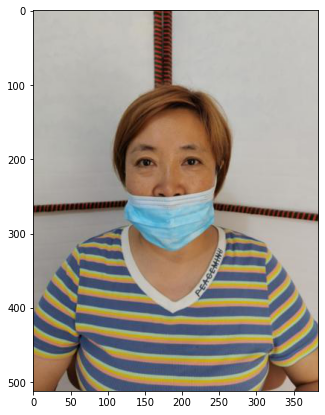

In [32]:
image = PIL.Image.open(im_with_label['path'][0])
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(image)

In [46]:
class ImageDataset(Dataset):
    def __init__(self, transform, train=True):
        df = im_with_label.sample(frac=1, random_state= 1)
        
        self.path = df['path'].reset_index(drop=True)
        self.label = df['label'].reset_index(drop=True)
        self.train = train
        
        if train:
            self.path = self.path[:int(len(self.path)*0.8)]
            self.label = self.label[:int(len(self.label)*0.8)]
        else:
            self.path = self.path[int(len(self.path)*0.8):].reset_index(drop=True)
            self.label = self.label[int(len(self.label)*0.8):].reset_index(drop=True)
        
        self.transform = transform
        
        
    def __len__(self):
        return len(self.label)
    
    def __getitem__(self, idx):
#         image = self.transform(PIL.Image.open(self.path[idx])) # 기존 torchvision transformer 사용시
        if self.train:
            image = self.transform(image = np.array(PIL.Image.open(self.path[idx])))
        else:
            image = self.transform(image = np.array(PIL.Image.open(self.path[idx])))
            
        label = torch.tensor(self.label[idx])
        return image, label

## 모델 생성

In [7]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(64, 32),
            nn.ReLU(inplace=True),
            nn.Linear(32, num_classes),
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

### 사전학습 모델 사용

### Feature extraction용

In [34]:
model_name = 'densenet161'
model = torchvision.models.densenet161(pretrained=True)

# 학습못하게 만든다
for param in model.parameters():
    param.requires_grad = False
    
# 새로운 분류기
classifier = nn.Sequential(nn.Linear(2208, 300),
                      nn.ReLU(),
                      nn.Dropout(p=0.2),
                      nn.Linear(300, 18))

model.classifier = classifier

In [2]:
model_name = 'tf_efficientnet_l2_ns'
model = timm.create_model('tf_efficientnet_l2_ns', pretrained=True)

# 학습못하게 만든다
for param in model.parameters():
    param.requires_grad = False
    
# 새로운 분류기
classifier = nn.Sequential(nn.Linear(5504, 300),
                      nn.ReLU(),
                      nn.Dropout(p=0.5),
                      nn.Linear(300, 18))

model.classifier = classifier

Parameter containing:
tensor([[[[-7.1015e-02, -7.4825e-03, -2.6722e+00],
          [ 1.2139e-01,  2.5939e+00, -1.3160e-02],
          [-3.7706e-03,  1.2238e-01, -6.5839e-02]],

         [[-1.1806e-01,  1.1452e-01, -3.3701e+00],
          [ 1.0073e-01,  3.3249e+00, -2.3354e-02],
          [-2.4927e-02,  5.5181e-02, -6.0388e-02]],

         [[-3.5298e-02, -4.3385e-02, -1.8410e+00],
          [ 1.0078e-01,  1.8295e+00, -3.8699e-02],
          [-2.8409e-02,  1.2207e-01, -4.0234e-02]]],


        [[[ 1.5202e-01,  3.1291e-01,  5.4649e-01],
          [ 9.6700e-02,  3.2516e-01,  9.8323e-02],
          [-2.4949e-01, -6.3303e-01, -4.2651e-01]],

         [[-1.1970e-01, -6.9384e-02, -8.8281e-02],
          [ 9.2738e-03,  1.7354e-01,  6.2875e-02],
          [-7.2057e-03,  3.3736e-02,  1.3158e-02]],

         [[-2.8984e-02, -2.6541e-01, -4.5259e-01],
          [-1.5698e-01, -2.0622e-01, -3.2785e-01],
          [ 2.4996e-01,  5.6613e-01,  4.0598e-01]]],


        [[[ 1.4137e-02,  9.5288e-02, -2.5207

In [23]:
for param in model.blocks[6].parameters():
    param.requires_grad = False

In [24]:
for param in model.conv_head.parameters():
    param.requires_grad=False

In [19]:
model.conv_head

Conv2d(1376, 5504, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [26]:
model

EfficientNet(
  (conv_stem): Conv2dSame(3, 136, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNorm2d(136, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (act1): SiLU(inplace=True)
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(136, 136, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=136, bias=False)
        (bn1): BatchNorm2d(136, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (act1): SiLU(inplace=True)
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(136, 34, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(34, 136, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(136, 72, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(72, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
    

In [5]:
model = timm.create_model('efficientnet_b3_pruned', pretrained=True)
model

Downloading: "https://imvl-automl-sh.oss-cn-shanghai.aliyuncs.com/darts/hyperml/hyperml/job_45403/outputs/effnetb3_pruned_5abcc29f.pth" to /opt/ml/.cache/torch/hub/checkpoints/effnetb3_pruned_5abcc29f.pth


EfficientNet(
  (conv_stem): Conv2dSame(3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNorm2d(40, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (act1): SiLU(inplace=True)
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
        (bn1): BatchNorm2d(40, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (act1): SiLU(inplace=True)
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
     

### Fine tuning

In [11]:
for param in model.parameters():
    param.requires_grad = True

In [326]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

### 모델 불러오기

In [22]:
model.load_state_dict(torch.load('checkPoints/model_save7.pt'))

<All keys matched successfully>

## 학습

In [47]:
# transforms data
# transform_train = transforms.Compose([
#     transforms.ToTensor(),
# ])

# Using Albumentations
transform_train = albumentations.Compose(
    [
        albumentations.augmentations.crops.transforms.CenterCrop(400, 300, p=1.0),
        albumentations.Rotate(limit=40, p=0.9, border_mode=cv2.BORDER_CONSTANT),
        albumentations.HorizontalFlip(p=0.5),
        albumentations.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.9),
        albumentations.OneOf([
            albumentations.Blur(blur_limit=3, p=0.5),
            albumentations.ColorJitter(p=0.5)
        ], p=0.6),
        
        albumentations.OpticalDistortion(p=0.7, border_mode=cv2.BORDER_CONSTANT),
        albumentations.GridDistortion(p=0.7, border_mode=cv2.BORDER_CONSTANT),
        albumentations.augmentations.transforms.GaussNoise(var_limit=(1000.0, 5000.0), p=0.5),
        albumentations.augmentations.transforms.GaussianBlur(),
        albumentations.augmentations.transforms.Blur(),
        
        albumentations.Normalize(
            mean=[0.5, 0.5, 0.5],
            std=[0.2, 0.2, 0.2],
            max_pixel_value=255
        ),
        ToTensorV2(),
    ]
)

# transform_test = transforms.Compose([
# #     transforms.ToTensor()
# #     transforms.Resize((512, 384), Image.BILINEAR),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.2, 0.2, 0.2)),
# ])

transform_test = albumentations.Compose(
    [
        albumentations.augmentations.crops.transforms.CenterCrop(400, 300, p=1.0),
        
        albumentations.Normalize(
            mean=[0.5, 0.5, 0.5],
            std=[0.2, 0.2, 0.2],
            max_pixel_value=255
        ),
        ToTensorV2(),
    ]
)

train_dataset = ImageDataset(transform_train, train=True)
test_dataset = ImageDataset(transform_test, train=False)

In [13]:
# 데이터 밸런싱
# sampler to make the dataset balaneced
class_weights = [0] * 18
for class_ in im_with_label['label']:
    class_weights[class_] += 1

class_weights = list(map(lambda x: 1/x, class_weights))
sample_weights = [0] * len(train_dataset)

for idx, (data, label) in enumerate(train_dataset):
    class_weight = class_weights[label]
    sample_weights[idx] = class_weight
    if idx == 15119:
        break

In [24]:
# sample_weights_4_sampler 피클담기
with open('sample_weights_4_sampler.txt', 'wb') as fp:
    pickle.dump(sample_weights, fp)

In [48]:
# sample_weights_4_sampler 피클 열기
with open('sample_weights_4_sampler.txt', 'rb') as fp:
    sample_weights = pickle.load(fp)
    

sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

In [49]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = 64,
                                          sampler=sampler,
                                          num_workers=2)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = 64,
                                          num_workers=2,
                                          shuffle=True)

In [50]:
# model = NeuralNet(0,0,18).to(device)
model = model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.1, patience=3, verbose=True)


In [51]:
image, label = next(iter(train_dataset))

### 이미지 변환 확인

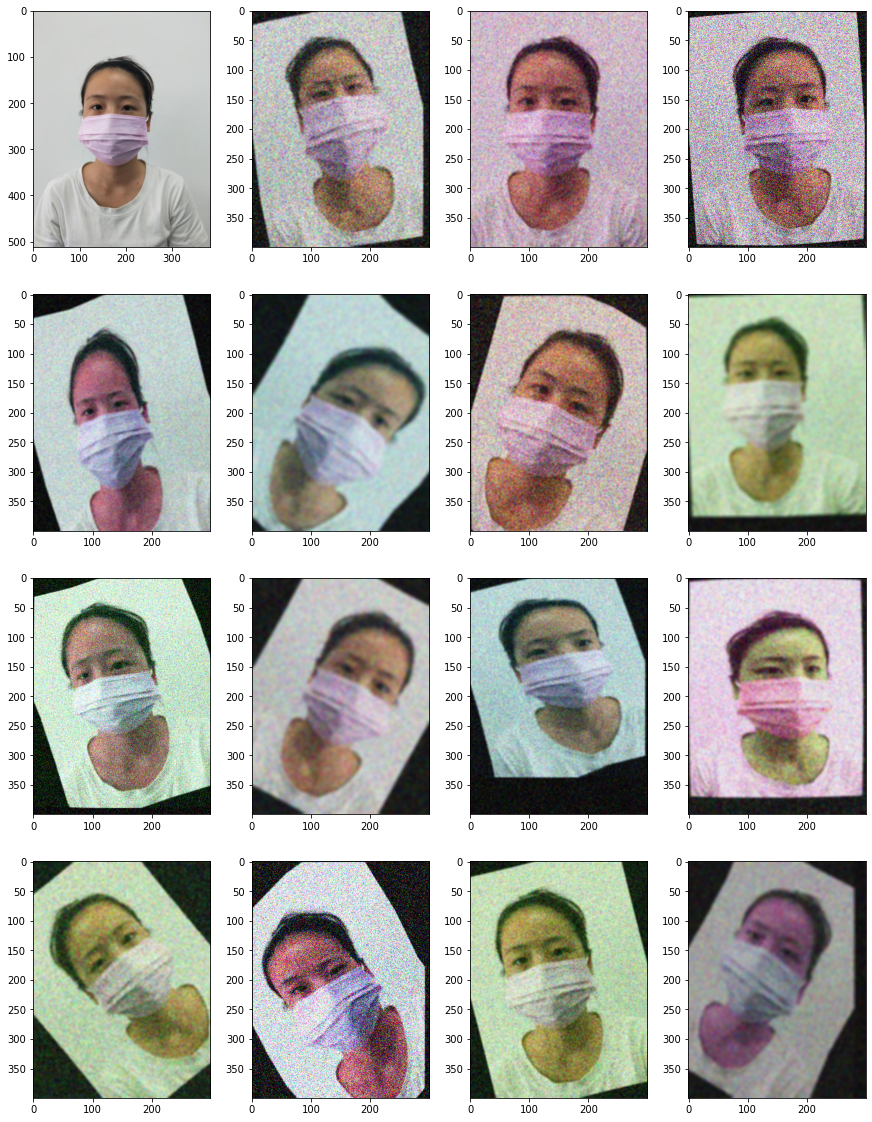

In [26]:
image = PIL.Image.open(im_with_label['path'][5632])
images_list = [image]
image = np.array(image)
for i in range(15):
    augmentations = transform_train(image=image)
    augmented_img = augmentations['image']
    images_list.append(augmented_img)

fig, ax = plt.subplots(4,4, figsize=(15, 20))
ax = ax.flatten()
for i,image in enumerate(images_list):
    if i == 0:
        ax[i].imshow(image)
    else:
        ax[i].imshow(image.permute(1,2,0))
plt.show()

In [72]:
next(iter(test_dataset))

KeyError: 0

In [55]:
image, label = next(iter(test_loader))

KeyError: 0

In [32]:
image

{'image': tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0

In [ ]:
#!watch -n 0.1 nvidia-smi

In [16]:
test_loss_min = np.Inf
loss_higher_counter = 0
early_stopping_thresh= 7

# total_train_loss=0
# total_test_loss=0

for epoch in tqdm.tqdm(range(200)):
    train_loss = 0
    train_correct = 0
    train_total = 0
    
    test_loss = 0
    test_correct = 0
    test_total = 0
    
    for images, labels in train_loader:
#         images = images.to(device)
        images = images['image'].to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = outputs.max(1)
        
        train_total += labels.size(0)
        train_correct += predicted.eq(labels).sum().item()
        
    print('\nCurrent epoch:', str(epoch))
    print('Current benign train accuracy:', str(train_correct / train_total))
    print('Current benign train loss:', train_loss)
    
    with torch.no_grad():
        model.eval()
        for images, labels in test_loader:
#             images = images.to(device)
            images = images['image'].to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)

            test_loss += loss.item()
            _, predicted = outputs.max(1)

            test_total += labels.size(0)
            test_correct += predicted.eq(labels).sum().item()
            
        print('Current benign test accuracy:', str(test_correct / test_total))
        print('Current benign test loss:', test_loss)
        
        model.train()
    
    scheduler.step(test_loss)
    
    if test_loss <= test_loss_min:
        torch.save(model.state_dict(), 'checkPoints/'+model_name+str(epoch)+'.pt')
        test_loss_min = test_loss
        print('model saved')
        loss_higher_counter = 0
        best_model = 'checkPoints/'+model_name+str(epoch)+'.pt'
    else:
        loss_higher_counter +=1
    
    if early_stopping_thresh == loss_higher_counter:
        break
    
    
    
# print('\nTotal train accuracy:', 100. * correct / total)
# print('Total train loss:', total_train_loss)
# print('\nTotal test accuracy:', 100. * correct_test / total_test)
# print('Total test loss:', total_test_loss)

100%|██████████| 237/237 [08:26<00:00,  2.14s/it]


Current epoch: 0
Current benign train accuracy: 0.27215608465608465
Current benign train loss: 584.7260196208954


Current benign test accuracy: 0.3314814814814815
Current benign test loss: 143.94313597679138


  0%|          | 0/237 [00:00<?, ?it/s]

model saved



100%|██████████| 237/237 [08:29<00:00,  2.15s/it]


Current epoch: 1
Current benign train accuracy: 0.34993386243386243
Current benign train loss: 512.5494230985641


Current benign test accuracy: 0.35555555555555557
Current benign test loss: 127.79621422290802


  0%|          | 0/237 [00:00<?, ?it/s]

model saved



100%|██████████| 237/237 [08:29<00:00,  2.15s/it]


Current epoch: 2
Current benign train accuracy: 0.40654761904761905
Current benign train loss: 456.77656614780426


Current benign test accuracy: 0.3851851851851852
Current benign test loss: 110.11743819713593


  0%|          | 0/237 [00:00<?, ?it/s]

model saved



100%|██████████| 237/237 [08:28<00:00,  2.14s/it]


Current epoch: 3
Current benign train accuracy: 0.45085978835978835
Current benign train loss: 414.3174967765808


Current benign test accuracy: 0.5156084656084656
Current benign test loss: 95.54505169391632


  0%|          | 0/237 [00:00<?, ?it/s]

model saved



100%|██████████| 237/237 [08:26<00:00,  2.14s/it]


Current epoch: 4
Current benign train accuracy: 0.47063492063492063
Current benign train loss: 386.4936765432358


Current benign test accuracy: 0.48783068783068784
Current benign test loss: 88.58879292011261


  0%|          | 0/237 [00:00<?, ?it/s]

model saved



100%|██████████| 237/237 [08:24<00:00,  2.13s/it]


Current epoch: 5
Current benign train accuracy: 0.5017857142857143
Current benign train loss: 362.39320266246796


Current benign test accuracy: 0.5867724867724867
Current benign test loss: 84.1976455450058


  0%|          | 0/237 [00:00<?, ?it/s]

model saved



100%|██████████| 237/237 [08:26<00:00,  2.14s/it]


Current epoch: 6
Current benign train accuracy: 0.5152116402116402
Current benign train loss: 348.21189868450165


Current benign test accuracy: 0.6619047619047619
Current benign test loss: 74.38006067276001


  0%|          | 0/237 [00:00<?, ?it/s]

model saved



100%|██████████| 237/237 [08:25<00:00,  2.13s/it]


Current epoch: 7
Current benign train accuracy: 0.5335978835978836
Current benign train loss: 331.4779659509659


Current benign test accuracy: 0.7052910052910053
Current benign test loss: 70.45652884244919


  0%|          | 0/237 [00:00<?, ?it/s]

model saved



100%|██████████| 237/237 [08:25<00:00,  2.13s/it]


Current epoch: 8
Current benign train accuracy: 0.5492724867724867
Current benign train loss: 319.78785705566406


Current benign test accuracy: 0.7119047619047619
Current benign test loss: 67.4193696975708


  0%|          | 0/237 [00:00<?, ?it/s]

model saved



100%|██████████| 237/237 [08:27<00:00,  2.14s/it]


Current epoch: 9
Current benign train accuracy: 0.5613756613756614
Current benign train loss: 307.9929385781288


Current benign test accuracy: 0.6701058201058201
Current benign test loss: 63.390129029750824


  0%|          | 0/237 [00:00<?, ?it/s]

model saved



100%|██████████| 237/237 [08:25<00:00,  2.13s/it]


Current epoch: 10
Current benign train accuracy: 0.5652116402116402
Current benign train loss: 301.31948268413544


Current benign test accuracy: 0.7158730158730159
Current benign test loss: 60.32100510597229


  0%|          | 0/237 [00:00<?, ?it/s]

model saved



100%|██████████| 237/237 [08:28<00:00,  2.15s/it]


Current epoch: 11
Current benign train accuracy: 0.5717592592592593
Current benign train loss: 293.4508699774742


Current benign test accuracy: 0.7246031746031746
Current benign test loss: 57.999729216098785


  0%|          | 0/237 [00:00<?, ?it/s]

model saved



100%|██████████| 237/237 [08:29<00:00,  2.15s/it]


Current epoch: 12
Current benign train accuracy: 0.5859788359788359
Current benign train loss: 287.7551404237747


Current benign test accuracy: 0.7489417989417989
Current benign test loss: 55.1311274766922


  0%|          | 0/237 [00:00<?, ?it/s]

model saved



100%|██████████| 237/237 [08:26<00:00,  2.14s/it]


Current epoch: 13
Current benign train accuracy: 0.5905423280423281
Current benign train loss: 282.12705314159393


Current benign test accuracy: 0.7391534391534391
Current benign test loss: 54.18102425336838


  0%|          | 0/237 [00:00<?, ?it/s]

model saved



100%|██████████| 237/237 [08:27<00:00,  2.14s/it]


Current epoch: 14
Current benign train accuracy: 0.5928571428571429
Current benign train loss: 277.0590395927429


Current benign test accuracy: 0.7518518518518519
Current benign test loss: 52.269626438617706


  0%|          | 0/237 [00:00<?, ?it/s]

model saved



100%|██████████| 237/237 [08:27<00:00,  2.14s/it]


Current epoch: 15
Current benign train accuracy: 0.5961640211640211
Current benign train loss: 273.7171251177788



  0%|          | 0/237 [00:00<?, ?it/s]

Current benign test accuracy: 0.7402116402116402
Current benign test loss: 52.95345479249954



100%|██████████| 237/237 [08:27<00:00,  2.14s/it]


Current epoch: 16
Current benign train accuracy: 0.5985449735449735
Current benign train loss: 270.69529992341995


Current benign test accuracy: 0.7775132275132275
Current benign test loss: 47.24043917655945


  0%|          | 0/237 [00:00<?, ?it/s]

model saved



100%|██████████| 237/237 [08:27<00:00,  2.14s/it]


Current epoch: 17
Current benign train accuracy: 0.6056216931216931
Current benign train loss: 265.3669924736023



  0%|          | 0/237 [00:00<?, ?it/s]

Current benign test accuracy: 0.7476190476190476
Current benign test loss: 53.07134294509888



100%|██████████| 237/237 [08:28<00:00,  2.14s/it]


Current epoch: 18
Current benign train accuracy: 0.6080687830687831
Current benign train loss: 262.66501569747925



  0%|          | 0/237 [00:00<?, ?it/s]

Current benign test accuracy: 0.7666666666666667
Current benign test loss: 48.054166197776794



100%|██████████| 237/237 [08:24<00:00,  2.13s/it]


Current epoch: 19
Current benign train accuracy: 0.6176587301587302
Current benign train loss: 258.539563536644



  0%|          | 0/237 [00:00<?, ?it/s]

Current benign test accuracy: 0.7521164021164021
Current benign test loss: 49.621542096138



100%|██████████| 237/237 [08:26<00:00,  2.14s/it]


Current epoch: 20
Current benign train accuracy: 0.616468253968254
Current benign train loss: 256.4001297354698


Current benign test accuracy: 0.7722222222222223
Current benign test loss: 46.02480614185333


  0%|          | 0/237 [00:00<?, ?it/s]

model saved



100%|██████████| 237/237 [08:24<00:00,  2.13s/it]


Current epoch: 21
Current benign train accuracy: 0.6301587301587301
Current benign train loss: 251.1778833270073



  0%|          | 0/237 [00:00<?, ?it/s]

Current benign test accuracy: 0.7523809523809524
Current benign test loss: 48.19179821014404



100%|██████████| 237/237 [08:25<00:00,  2.13s/it]


Current epoch: 22
Current benign train accuracy: 0.6261904761904762
Current benign train loss: 248.6222219467163


Current benign test accuracy: 0.7743386243386243
Current benign test loss: 44.570069313049316


  0%|          | 0/237 [00:00<?, ?it/s]

model saved



100%|██████████| 237/237 [08:25<00:00,  2.13s/it]


Current epoch: 23
Current benign train accuracy: 0.6316798941798942
Current benign train loss: 245.84487545490265



  0%|          | 0/237 [00:00<?, ?it/s]

Current benign test accuracy: 0.7714285714285715
Current benign test loss: 45.89860653877258



100%|██████████| 237/237 [08:23<00:00,  2.12s/it]


Current epoch: 24
Current benign train accuracy: 0.6244708994708995
Current benign train loss: 246.62975019216537



  0%|          | 0/237 [00:00<?, ?it/s]

Current benign test accuracy: 0.7682539682539683
Current benign test loss: 47.4440855383873



100%|██████████| 237/237 [08:26<00:00,  2.14s/it]


Current epoch: 25
Current benign train accuracy: 0.635515873015873
Current benign train loss: 244.97614508867264


Current benign test accuracy: 0.7822751322751322
Current benign test loss: 43.4048228263855


  0%|          | 0/237 [00:00<?, ?it/s]

model saved



100%|██████████| 237/237 [08:29<00:00,  2.15s/it]


Current epoch: 26
Current benign train accuracy: 0.6300925925925925
Current benign train loss: 243.65979385375977



  0%|          | 0/237 [00:00<?, ?it/s]

Current benign test accuracy: 0.7648148148148148
Current benign test loss: 45.68536165356636



100%|██████████| 237/237 [08:27<00:00,  2.14s/it]


Current epoch: 27
Current benign train accuracy: 0.6363095238095238
Current benign train loss: 241.59205222129822


Current benign test accuracy: 0.7873015873015873
Current benign test loss: 42.920169949531555


  0%|          | 0/237 [00:00<?, ?it/s]

model saved



100%|██████████| 237/237 [08:29<00:00,  2.15s/it]


Current epoch: 28
Current benign train accuracy: 0.6437169312169312
Current benign train loss: 237.69360834360123



  0%|          | 0/237 [00:00<?, ?it/s]

Current benign test accuracy: 0.7902116402116403
Current benign test loss: 43.83665186166763



100%|██████████| 237/237 [08:28<00:00,  2.15s/it]


Current epoch: 29
Current benign train accuracy: 0.638095238095238
Current benign train loss: 239.23617100715637



  0%|          | 0/237 [00:00<?, ?it/s]

Current benign test accuracy: 0.7756613756613756
Current benign test loss: 44.17409297823906



100%|██████████| 237/237 [08:27<00:00,  2.14s/it]


Current epoch: 30
Current benign train accuracy: 0.6460978835978836
Current benign train loss: 235.99886894226074



  0%|          | 0/237 [00:00<?, ?it/s]

Current benign test accuracy: 0.7566137566137566
Current benign test loss: 47.054089426994324



100%|██████████| 237/237 [08:30<00:00,  2.15s/it]


Current epoch: 31
Current benign train accuracy: 0.6416005291005291
Current benign train loss: 236.3877347111702


Current benign test accuracy: 0.7880952380952381
Current benign test loss: 41.94183397293091


  0%|          | 0/237 [00:00<?, ?it/s]

model saved



100%|██████████| 237/237 [08:27<00:00,  2.14s/it]


Current epoch: 32
Current benign train accuracy: 0.6447089947089947
Current benign train loss: 233.8579174876213



  0%|          | 0/237 [00:00<?, ?it/s]

Current benign test accuracy: 0.7492063492063492
Current benign test loss: 45.72041255235672



100%|██████████| 237/237 [08:24<00:00,  2.13s/it]


Current epoch: 33
Current benign train accuracy: 0.6458333333333334
Current benign train loss: 233.9411460161209


Current benign test accuracy: 0.8002645502645502
Current benign test loss: 38.48898905515671


  0%|          | 0/237 [00:00<?, ?it/s]

model saved



100%|██████████| 237/237 [08:27<00:00,  2.14s/it]


Current epoch: 34
Current benign train accuracy: 0.6503306878306878
Current benign train loss: 232.1375830769539



  0%|          | 0/237 [00:00<?, ?it/s]

Current benign test accuracy: 0.801058201058201
Current benign test loss: 38.6775641143322



100%|██████████| 237/237 [08:26<00:00,  2.14s/it]


Current epoch: 35
Current benign train accuracy: 0.6552910052910053
Current benign train loss: 230.43493402004242



  0%|          | 0/237 [00:00<?, ?it/s]

Current benign test accuracy: 0.7608465608465609
Current benign test loss: 45.69443321228027



100%|██████████| 237/237 [08:27<00:00,  2.14s/it]


Current epoch: 36
Current benign train accuracy: 0.6579365079365079
Current benign train loss: 228.33507430553436



  0%|          | 0/237 [00:00<?, ?it/s]

Current benign test accuracy: 0.8
Current benign test loss: 38.73558974266052



100%|██████████| 237/237 [08:26<00:00,  2.14s/it]


Current epoch: 37
Current benign train accuracy: 0.656415343915344
Current benign train loss: 224.24861520528793



  0%|          | 0/237 [00:00<?, ?it/s]

Current benign test accuracy: 0.7838624338624338
Current benign test loss: 41.89330595731735
Epoch    38: reducing learning rate of group 0 to 1.0000e-05.



100%|██████████| 237/237 [08:26<00:00,  2.14s/it]


Current epoch: 38
Current benign train accuracy: 0.6595899470899471
Current benign train loss: 224.2543529868126



 19%|█▉        | 38/200 [7:33:38<32:13:54, 716.26s/it]

Current benign test accuracy: 0.7857142857142857
Current benign test loss: 42.459366261959076


In [17]:
# torch.save(model.state_dict(), 'DenseNet161.pt')

In [18]:
model.load_state_dict(torch.load(best_model))

<All keys matched successfully>

## 예측

In [19]:
test_dir = '/opt/ml/input/data/eval'

In [20]:
from torchvision.transforms import Resize, ToTensor, Normalize

In [24]:
class TestDataset(Dataset):
    def __init__(self, img_paths, transform):
        self.img_paths = img_paths
        self.transform = transform

    def __getitem__(self, index):
        image = Image.open(self.img_paths[index])

        if self.transform:
#             image = self.transform(image)
            image = self.transform(image = np.array(Image.open(self.img_paths[index])))
        return image

    def __len__(self):
        return len(self.img_paths)

In [26]:
# meta 데이터와 이미지 경로를 불러옵니다.
submission = pd.read_csv(os.path.join(test_dir, 'info.csv'))
image_dir = os.path.join(test_dir, 'images')

# Test Dataset 클래스 객체를 생성하고 DataLoader를 만듭니다.
image_paths = [os.path.join(image_dir, img_id) for img_id in submission.ImageID]
# transform = transforms.Compose([
# #     Resize((512, 384), Image.BILINEAR),
#     ToTensor(),
#     Normalize(mean=(0.5, 0.5, 0.5), std=(0.2, 0.2, 0.2)),
# ])
transform = albumentations.Compose(
    [
        albumentations.augmentations.crops.transforms.CenterCrop(400, 300, p=1.0),
        albumentations.Normalize(
            mean=[0.5, 0.5, 0.5],
            std=[0.2, 0.2, 0.2],
            max_pixel_value=255
        ),
        ToTensorV2(),
    ]
)
dataset = TestDataset(image_paths, transform)

loader = DataLoader(
    dataset,
    shuffle=False
)

# 모델을 정의합니다. (학습한 모델이 있다면 torch.load로 모델을 불러주세요!)
device = torch.device('cuda')
model = model.to(device)
model.eval()

# 모델이 테스트 데이터셋을 예측하고 결과를 저장합니다.
all_predictions = []
for images in tqdm.tqdm(loader):
    with torch.no_grad():
#         images = images.to(device)
        images = images['image'].to(device)
        pred = model(images)
        pred = pred.argmax(dim=-1)
        all_predictions.extend(pred.cpu().numpy())
submission['ans'] = all_predictions

# 제출할 파일을 저장합니다.
submission.to_csv(os.path.join(test_dir, 'submission.csv'), index=False)
print('test inference is done!')

100%|██████████| 12600/12600 [31:10<00:00,  6.74it/s]

test inference is done!


In [1]:
gc.collect()

NameError: name 'gc' is not defined